<a href="https://colab.research.google.com/github/abidshafee/DataScienceYouTubeTutorials/blob/master/Optimizing_input_params_for_ML_Model_%7C_Categorical_lagends_in_Scatter_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Optimizing input params for ML Model | PCA Scatter Plot with appropriate categorical Legends**
The reason for this approach is not to show you how to build an ML model from scratch, rater we will see here how to prepare (chose) better input parameters for building Machine Learning Model. And we will also see how to draw PCA scatter plot with appropriate Categorical Legends. Because we know that scatter plot shows us spotting outliers in the dataset.

In [2]:
import pandas as pd
import numpy as np
# To Check each parameters Contribution to generate target y
from sklearn.ensemble import ExtraTreesRegressor
# Plotting tools
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
style.use('ggplot')

**Uploading the Dataset**\
Here, I will be working here with the Breast Cancer dataset

In [3]:
from google.colab import files
file = files.upload()

Saving BreastCancer_data.csv to BreastCancer_data.csv


Reading the dataset into pandas dataframe

In [4]:
df = pd.read_csv('BreastCancer_data.csv',  index_col=False)

As we have previous worked with this dataset, therefore we know it has an empty column

In [ ]:
df.head(2)

Checking null values in the dataframe

In [ ]:
df.isna().sum()

Let's quickly get rid of that 'Unnamed: 32' column

In [5]:
df.dropna(axis=1, inplace=True)

`axis=1` means we have targeted the column that has the null values. check out this [***link>>***](https://https://youtu.be/QStMjyxVkqw) where have shown a complete data cleaning procedure step by step of any given dataset..

In [ ]:
df.head(2)

**Now let seperate the numerical colums for input parameters `X` for building Machine Learning Model.**\
As we can see we have all columns are already numerical therefore, luckily, we don't need go through any extra hassle here. The only categorical column is the 'diagnosis' column that we need to convert into numeric values. Because the values in this column are our targeted outputs **`y`** for each set of input **`X`**.

In [ ]:
df.info()

In [6]:
# input params
X = df.iloc[:, 2:]

In [ ]:
X.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [7]:
# targeted output
y = df.iloc[:,1]

In [ ]:
y

In [ ]:
type(y)

pandas.core.series.Series

**Converting Categorical Diagnosis column to Numeric values**

In [8]:
y = np.where(y=='M', 1, 0)

### **HotEncoder()**
Or we can transform categorical variables to numeric values using **`sklearn HotEncoder`**. Advantages of using hotencoder that we can use hotencoder on multiple columns using **`make_column_transformer`** function. However, it might be the topic of another discussion.\
`from sklearn.preprocessing import OneHotEncoder`\
`encoder = OneHotEncoder(sparse=False)`\
`target = encoder.fit_transform(df[['diagnosis']])`\
It returns two list of two seperate categories: a list of Bs and a list of Ms.\
`encoder.categories_`\
`>>[array(['B', 'M'], dtype=object)]`

**We could also use sklearn's `LabelEncoder` class to convert Categorical variable to numeric values**. See [here>>](https://youtu.be/kW1Sm8S1Jf0)

In [ ]:
y

In [ ]:
y[1]

1

### Different ways of accessing columns

In [ ]:
print(type(df[df.columns[1]]))

<class 'pandas.core.series.Series'>


In [ ]:
print(type(df['diagnosis']))

<class 'pandas.core.series.Series'>


In [ ]:
print(type(df[['diagnosis']]))

<class 'pandas.core.frame.DataFrame'>


## **Correlation Matrix**

Lets quickly check the correlation Matrix between input parameters if we have any highly correlated columns in our input parameters.

In [ ]:
corr=X.corr()
corr

Lets plot the heat map of the correlation matrix

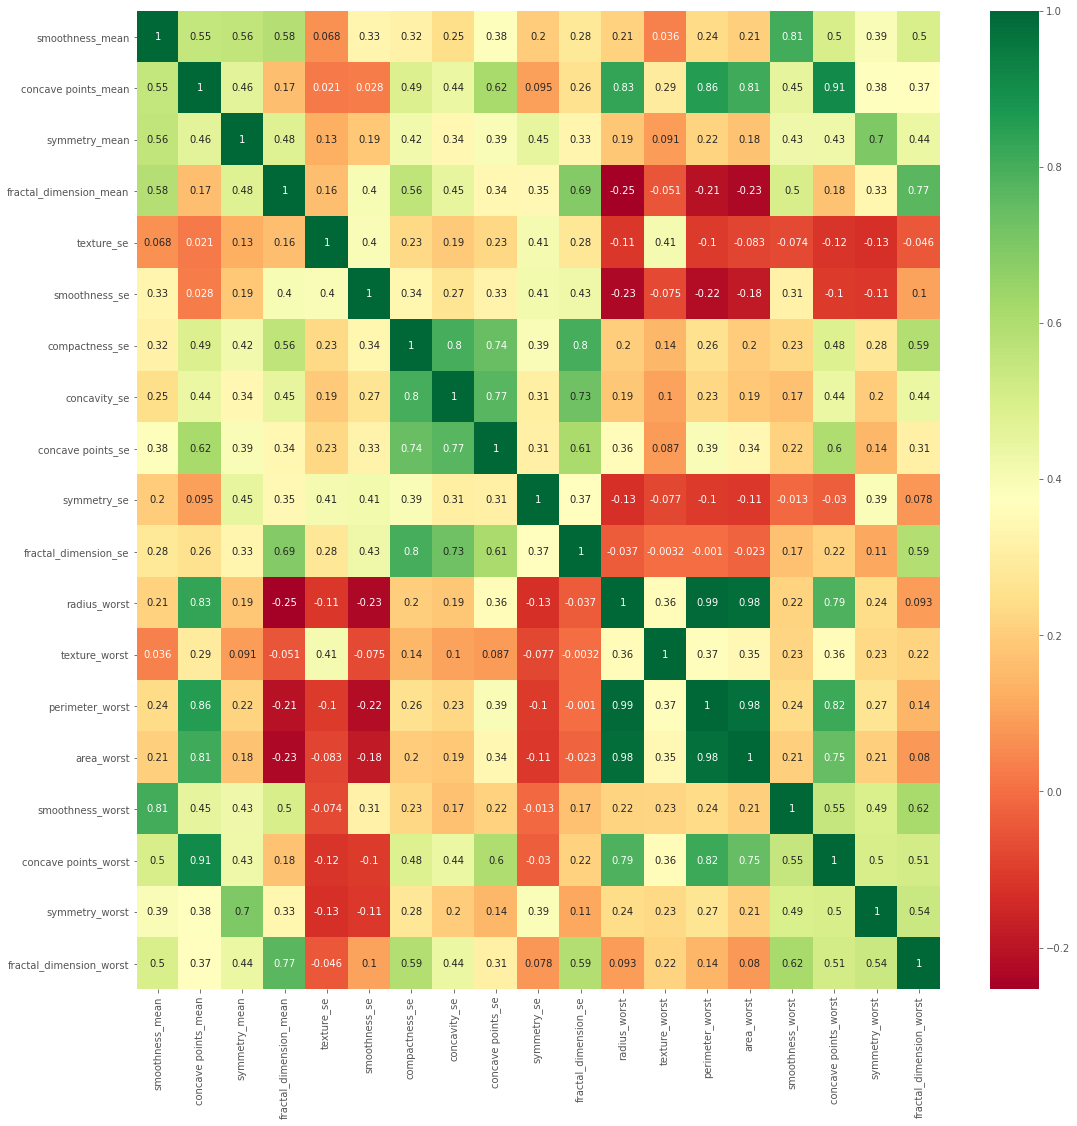

In [ ]:
top_corr_features=corr.index 
plt.figure(figsize=(18,18))
#plot heat map 
sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Validating Correlation two columns

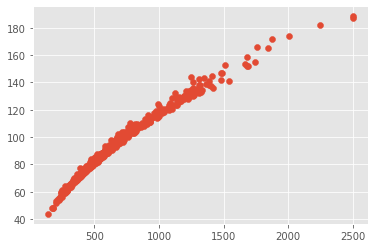

In [ ]:
plt.scatter(X[X.columns[3]],X[X.columns[2]])

Negative Correlation

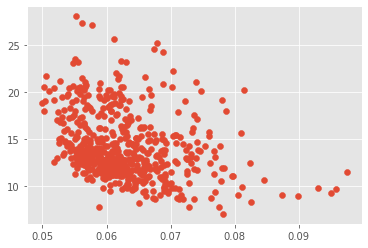

In [ ]:
plt.scatter(X['fractal_dimension_mean'],X['radius_mean'])

In [ ]:
sns.displot(X[X.columns[3]]-X[X.columns[2]], legend=True)

Now, Before dropping the most **correlative features** or parameter, Let's check which parameter contributing how much to predict the target `y`

In [ ]:
Contribution = ExtraTreesRegressor()

In [ ]:
Contribution.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
result = Contribution.feature_importances_
print('Values are in percentages (%)')
print(str(result*100))

Values are in percentages (%)
[ 3.8057013   1.93135092  4.65585148  1.56310906  0.4533802   0.27010392
  5.10274967 13.80746414  0.3504421   0.27602075  0.84159708  0.37450788
  0.54709175  1.70649137  0.54023717  0.53446643  0.34177034  0.37357213
  0.45766346  0.28662181 11.08502864  2.98352576 11.29975592 10.11025108
  2.00574305  0.96842218  3.04692195 19.01044197  0.7393203   0.53039617]


In [ ]:
X.head(2)

In [ ]:
X.columns[1]

'texture_mean'

In [ ]:
print('Datas in Column: ' + X.columns[1] + ', Contributed >> ' + str(round(result[1]*100, 2)) + '%')

Datas in Column: texture_mean, Contributed >> 1.93%


### **The results in percentage**
**`contributing_params`** is pandas series we have declared below

plot graph of feature importances for better visualization 

In [ ]:
# let's make a pandas series with the result
# and we declare the cokumn names as its index
contributing_params = pd.Series(result, index=X.columns)
contributing_params_in_percent = pd.Series(result*100, index=X.columns)

# taking 10 largest values from the series of results
nlargest_results = contributing_params_in_percent.nlargest(10)
nlargest_results.plot(kind='barh')
plt.show()

### Here it is every rows contribution to the target y in percentage.

In [ ]:
n=0
for i in contributing_params.index:
  print(i + ' >> ' + str(round(result[n]*100, 2)) +'%')
  n+=1

**So now we can drop the correlated colum that contributed less to the output.**

### **Most contributing features to the target y:**
**concave points_worst >> 19.01%**\
**concave points_mean >> 13.81%**\
**perimeter_worst >> 11.3%**\
**radius_worst >> 11.09%**\
**area_worst >> 10.11%** 

### **Extremely Correlated features we've found in the correlation matrix:**

*radius_mean',	'perimeter_mean', 'area_mean', 'texture_mean', 'texture_mean', '**concave points_mean**', '**radius_worst**', 'radius_se', 'perimeter_se', 'area_se', '**area_worst**','compactness_worst', 'concavity_worst', 'compactness_mean', 'concavity_mean'*


## **Dropping the Highly correlated columns, except mostly contributing features to the target `y`**

In [9]:
X.drop(['radius_mean',	'perimeter_mean', 'area_mean', 'texture_mean'], axis=1, inplace=True)
X.drop(['radius_se', 'perimeter_se', 'area_se'], axis=1, inplace=True)
X.drop(['compactness_worst', 'concavity_worst', 'compactness_mean'], axis=1, inplace=True)
X.drop(['concavity_mean'], axis=1, inplace=True)

In [ ]:
X.head()

,smoothness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.11840,0.14710,0.2419,0.07871,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.2654,0.4601,0.11890
1,0.08474,0.07017,0.1812,0.05667,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1860,0.2750,0.08902
2,0.10960,0.12790,0.2069,0.05999,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.2430,0.3613,0.08758
3,0.14250,0.10520,0.2597,0.09744,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.2575,0.6638,0.17300
4,0.10030,0.10430,0.1809,0.05883,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.1625,0.2364,0.07678


Hence we have now coparetively more cleaner input parameters than we started with before.

In [ ]:
X.shape

(569, 19)

Also we need to go through other anomely detection procedure before training the model with the final dataset. Which we will see in our video on Anomaly detection: [here>>](https://#)

## Standard Deviation std()
standard deviation tells us how fast the datapoint changes from one point to another. Means is there a small variability in the dataset or there is a high variability between datapoint in average. We generally plot Gausian distribution or Normal distribution to plot the variability or data distribution through the dataset

In [ ]:
print(X.columns[1])
print('Standard Deviation of the column: ' + X.columns[1] + '>> ' + str(X[X.columns[1]].std()))

texture_mean
Standard Deviation of the column: texture_mean>> 4.301035768166949


SNS dist plot is actually plotting the **`density function`** or area under the curve that tells us how many time what values of certain feature existed in the dataset, or what the distribution of certain feature in the dataset.

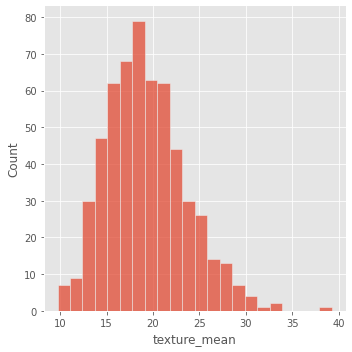

In [ ]:
sns.displot(X[X.columns[1]], legend=True)

So it says that the value of **`texture_mean`** around **`15 to 21`** found most of the time in the dataset.

# **PCA Scatter Plot with approtriate categorical Lagends**

In [10]:
# for dimentionality reduction
from sklearn.decomposition import PCA
# to re-center data to the origin
from sklearn.preprocessing import StandardScaler
# To perform multiple function on the data parallelly
from sklearn.pipeline import Pipeline
# Or
# from sklearn.pipeline import make_pipeline
import plotly.express as px # for 3D plot

PCA only performed numeruc valuees. Therefore we will take only those features that are numeric. As our input params of breast cancer dataset are all numeric, so we don't need to be worried about that.

### We can load data from `sklearn.dataset`. Since we already have optimized input data X we have built above, so we can utilize the dataset here for plotting the pca scatter plot>>

In [ ]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [ ]:
dir(breast_cancer)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [ ]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### **Feature Scaling**
As the breast cancer dataset different features consists of different-different types of values therefore we need these features scale down in certain range of values. Hence PCA performs best on scaled data.\
Here we have scalled down features using **`StandardScaler`** function that scaled down features values within [standard deviation range>>](https://csschoolonline.xyz/normal-distribution-gaussian-distribution-statistics-for-machine-learning/)

In [11]:
scalar = StandardScaler()
sX = scalar.fit_transform(X)
print(sX)

[[ 1.56846633e+00  2.53247522e+00  2.21751501e+00 ...  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [-8.26962447e-01  5.48144156e-01  1.39236330e-03 ...  1.08708430e+00
  -2.43889668e-01  2.81189987e-01]
 [ 9.42210440e-01  2.03723076e+00  9.39684817e-01 ...  1.95500035e+00
   1.15225500e+00  2.01391209e-01]
 ...
 [-8.40483881e-01  1.05777359e-01 -8.09117071e-01 ...  4.14068691e-01
  -1.10454895e+00 -3.18409158e-01]
 [ 1.52576706e+00  2.65886573e+00  2.13719425e+00 ...  2.28998549e+00
   1.91908301e+00  2.21963528e+00]
 [-3.11208479e+00 -1.26181958e+00 -8.20069901e-01 ... -1.74506282e+00
  -4.81382136e-02 -7.51206693e-01]]


### **Applying PCA on scalled data | 2D**

In [12]:
pca = PCA(n_components=2)

In [13]:
pca.fit(sX)
#we are fitting or projecting scalled data onto 2d plane

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
comps_sX = pca.transform(sX)
#transforming projected data into 2d components

Here we have fit the data and transform it seperately, or we can say:\
**`pca.fit(sX).transform(sX)`**, or we can call the **`fit_transform()`** function all together: **`comp_sX = pca.fit_transform(sX)`** that would do the same thing.

In [15]:
print(sX.shape)
print(comps_sX.shape)

(569, 19)
(569, 2)


Here, PCA reduces 19 features input parameter X into 2 pca components

**Accessing PCA components**

Accessing pca components all rows : of column 0, and column 1

In [16]:
comps_sX[:,[0,1]]

array([[ 6.60574165, -0.78852684],
       [ 0.78205937, -3.30240129],
       [ 3.7902158 , -2.09974678],
       ...,
       [-0.04935591, -1.5550077 ],
       [ 7.02365571, -1.34081256],
       [-4.6155165 ,  0.86576532]])

Using this components we will be able to draw pca scatter plot

### **PCA Scatter plot with appropriate categorical Lagends | 2D**

In [17]:
diagnosis = ['Benign', 'Malignant'] 
# we let this categorical names, bcoz dataset doesn't provide any!
# Converting the python list: Dependent_count to numpy array
diagnosis = np.array(diagnosis)

In [18]:
diagnosis

array(['Benign', 'Malignant'], dtype='<U9')

In [19]:
unique_y = np.unique(y)
print(unique_y)

[0 1]


**Remember that We have converted all Ms to 1, and all Bs to 0. Therefore in the diagnosis list we have taken the Benign>>0, first, and then the Malignant>>1.**

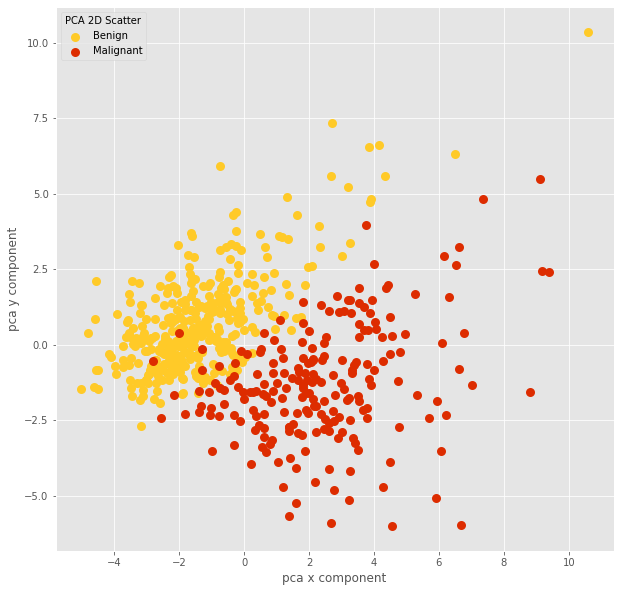

In [20]:
colors = ['#ffca28', '#dd2c00']

plt.figure(figsize=(10,10))

for color, i, diagn in zip(colors, unique_y, diagnosis):
    plt.scatter(comps_sX[y==i, 0], comps_sX[y==i, 1], alpha=1, lw=3,
                label=diagn, color=color)

plt.legend(loc='best', shadow=False, scatterpoints=1, title='PCA 2D Scatter')
plt.xlabel('pca x component')
plt.ylabel('pca y component')
plt.show()

Count of PCA components

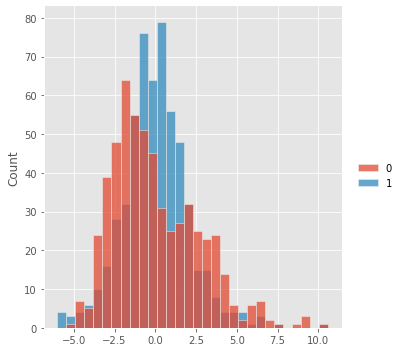

In [25]:
sns.displot(data = comps_sX)

### **Using Pipeline**
pipeline chains multiple step together, which means output of each steps the pipeline uses as the input of the next step. Here we have imported the pipeline function, Or we could import the "make pipeline" function instead. Because They are both functionally equivalent.

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=2))])

So here what the pipeline does is, it takes the data first into the `StandaedScaler()` function and then passes the output data as input to the next function `PCA()`.

In [ ]:
compX_pipe = pipe.fit_transform(X)

**Accessing PCA components**

In [ ]:
# all rows of 2 pca components using pipeline
compX_pipe[:,[0,1]]

array([[ 6.60574162, -0.78852682],
       [ 0.78205937, -3.3024013 ],
       [ 3.79021583, -2.09974681],
       ...,
       [-0.04935591, -1.55500769],
       [ 7.02365571, -1.34081253],
       [-4.61551651,  0.86576545]])

In [ ]:
# first pca components using pipeline
compX_pipe[:,0].shape

(569,)

In [ ]:
#first column of the pca component
comps_sX[:, 0].shape

(569,)

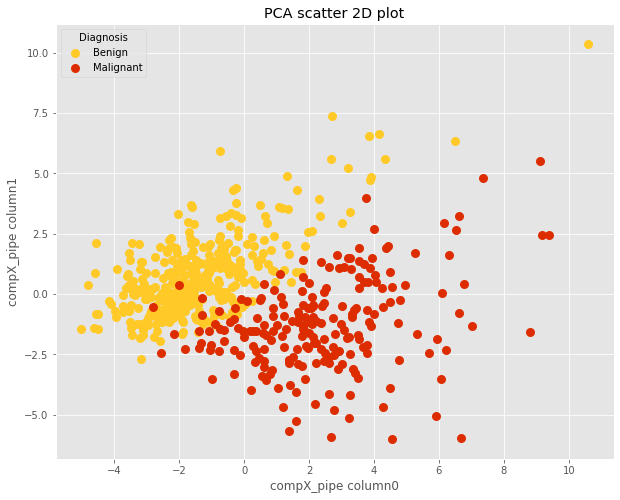

In [ ]:
plt.figure(figsize=(10,8))

for color, i, diagn in zip(colors, unique_y, diagnosis):
    plt.scatter(compX_pipe[y==i, 0], compX_pipe[y==i, 1], alpha=1, lw=3,
                label=diagn, color=color)
plt.title('PCA scatter 2D plot')
plt.legend(loc='best', shadow=False, scatterpoints=1, title='Diagnosis')
plt.xlabel('compX_pipe column0')
plt.ylabel('compX_pipe column1')
plt.show()

### **PCA scatter 3D plot**
**`plotly.express.scatter_3d(data_frame=df, x=col-1, y=col-2, z=col-0, color=target-col, symbol=target-col)`**
[3D Scatter Plots in Python
](https://https://plotly.com/python/3d-scatter-plots/#3d-scatter-plot-with-goscatter3d)

In [ ]:
pipe_3d = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=3))])

In [ ]:
comp3D = pipe_3d.fit_transform(X)

In [ ]:
# all rows of 3 pca components using pipeline
comp3D[:,[0,1,2]]

array([[ 6.60574164, -0.7885268 , -1.8749888 ],
       [ 0.78205937, -3.30240129,  0.40485112],
       [ 3.79021581, -2.09974689, -0.09182794],
       ...,
       [-0.04935591, -1.55500768,  1.87444423],
       [ 7.02365572, -1.34081261, -0.58119877],
       [-4.61551649,  0.86576515,  0.80013714]])

In [ ]:
comp3D.shape

(569, 3)

Creating new **Dataframe** with PCA 3D components for plotting using **`scatter_3d()`** function in **`plotly.express`** module

In [ ]:
pca3d_df = pd.DataFrame(comp3D, columns=['comp0', 'comp1', 'comp2'])

Converting numerical y values to categorical values again in diag3d, and assigning the values as target column of the pca3d_df Dataframe

In [ ]:
#diag3d = np.where(pca3d_df['diagon']==1, 'Malignant', 'Benign')
diag3d = np.where(y==1, 'Malignant', 'Benign')

Inserting target column to the dataframe

In [ ]:
pca3d_df['diagon'] = diag3d

In [ ]:
pca3d_df

In [ ]:
#px.scatter_3d(pca3d_df, comp3D[:,0], comp3D[:,1], comp3D[:,2], color= 'diagnosis')
fig = px.scatter_3d(pca3d_df, x='comp0', y='comp1', z='comp2', symbol= 'diagon', color = 'diagon',
                    size_max=12)
fig.update_layout(margin=dict(l=1, r=0, b=0, t=0))
fig.show()